#### The Assignment
This notebook was utilized as a part of my classwork in the Masters of Business Analytics Program at Seattle University. While this notebook wasn't directly submitted, it provided support evidence for answers on an academic assignment.

In this project, I developed a model to predict if a candidate who after accepting a job offer, will end up not accepting the role. A range of features of candidates were looked at to make this assessment.

#### Dataset
This dataset was part of the recruitment process of a particular client of ScaleneWorks. You can access this data set at the following <a href='https://www.kaggle.com/datasets/avikumart/hrdatasetclassif'>link.</a> Descriptions of each feature are included at the link as well.

---

# Exploring the Data
Our project begins wtih importing the necessary libraries, reading the dataset, and verifying the dataset was importing correctly.

The last column of our dataset 'Status' is our target variable. For 'Status', candidates fall into one of two categories either 'Joined' or 'Not Joined'.

In [97]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Loading the Dataset
df = pd.read_excel('DataSet_HR Analytics at Scalene Works.xlsx', sheet_name='Data')

# Displaying A Few Record
display(df.head())

# data.info()

c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning:

Unknown extension is not supported and will be removed



,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


### Addressing Missing Values

In [98]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'Misssing Values (Percent)': percent_missing})

missing_value_df = missing_value_df.sort_values('Misssing Values (Percent)', ascending=False).head(20) # Remove head to show more (if needed)
missing_value_df

,column_name,Misssing Values (Percent)
Duration to accept offer,Duration to accept offer,22.046542
Percent difference CTC,Percent difference CTC,6.900186
Pecent hike expected in CTC,Pecent hike expected in CTC,6.056920
Percent hike offered in CTC,Percent hike offered in CTC,4.832563
Candidate Ref,Candidate Ref,0.000000
Candidate Source,Candidate Source,0.000000
Age,Age,0.000000
Location,Location,0.000000
LOB,LOB,0.000000
Rex in Yrs,Rex in Yrs,0.000000


There was an attempt to impute missing values for the following three percentages:
- Percent hike expected in CTC - Percentage hike expected by the candidate
- Percent hike offered in CTC - Percentage hike offered by the company
- Percent difference CTC - Difference between expected and offered hike

There were 388 rows where all three of these columns were missing in that row. These rows were dropped.

In [99]:
# Dropping rows where all three percentage columns are missing data
df = df[df['Percent difference CTC'].notnull() & df['Pecent hike expected in CTC'].notnull() & df['Percent hike offered in CTC'].notnull()]

Additionally, there was an attempt to impute percentages in rows where two of three values in these columns were found, and then imputing the missing value based on the difference. Unfortunately, there were no cases where 2/3 of the colums contained data. As such, these rows were dropped as well.

In [100]:
df = df[df['Pecent hike expected in CTC'].notnull()]
df = df[df['Percent difference CTC'].notnull()]
df = df[df['Percent hike offered in CTC'].notnull()]

After this was done, approximately 21% of the dataset still contained missing values for 'Duration to accept offer'. It was found that 19 candidates accepted the offer in a negative amount of time, which logically doesn't make sense. Although these values were deleted, the rows were kept.

In [101]:
df.drop(df[(df['Duration to accept offer'] < 0)].index, inplace=True)

Seeing the distribution of data is an important factor when deciding the appropriate imputation technique. 
The missing data was imputed with the median after it was found that some extreme outliers existed. In the future, this model could potentially be improved by using more advanced imputation techniques or by assessing model performance after deleting these rows which were imputed.

In [102]:
df['Duration to accept offer'] = df['Duration to accept offer'].fillna(df['Duration to accept offer'].median())

Now there are no missing values in the dataset.

In [104]:
# Write DataFrame to Excel file
df.to_excel('ScalenWorks_AfterMissingValuesImputed.xlsx')

## Univariate Analysis

Before model developement, univariate analysis was conducted on different features.

### Duration to Accept Offer

In [94]:
{
    "tags": [
        "hide-input",
    ]
}
import plotly.express as px

# Made naming convetion change and it's easier to just do this then re-impute everything
data = df

# Boxplot Comparison of Candidates
df = px.data.tips()
fig = px.box(data, x='Duration to accept offer',
                   color="Status",
                   points='all',
                   title="Boxplot Comparison of Candidates")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_xaxes(title_text='Days Given to Accept Offer')
fig.show()


# Boxplot Comparison of Candidates by Offer Bands
df = px.data.tips()
fig = px.box(data,
             x='Offered band',
             y="Duration to accept offer",
             color="Status",
             points='all',
             title="Boxplot Comparison of Candidates by Offer Bands")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_yaxes(title_text='Days Given to Accept Offer')
fig.update_xaxes(title_text='Offer Band [Band offered to candidate based on experience & performance]')
fig.update_xaxes(categoryorder='array',categoryarray= ['E0', 'E1', 'E2', 'E3', 'E4'])
fig.show()


# Boxplot Comparison of Candidates By Source
df = px.data.tips()
fig = px.box(data, x='Candidate Source',
                   y="Duration to accept offer",
                   color="Status",
                   points='all',
                   title="Boxplot Comparison of Candidates By Source")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_yaxes(title_text='Days Given to Accept Offer')
fig.update_xaxes(title_text='Candidate Source')
fig.show()

While the majorty of the candidates who accepted the offer did so in under approximately ten days, I'm curious if among those who accepted the job offer if the duration to accept to offer appears to be associated with other features.

It does seem like the most extreme outliers are for folks who were directly targeted for recruiting, which makes sense since the candidates probably know their worth so they can take their time on responding.

In [5]:
df = px.data.tips()
fig = px.box(data, x='LOB',
                   y="Duration to accept offer",
                   color="Status",
                   title="Boxplot Comparison of Candidates By Line of Business")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_yaxes(title_text='Days Given to Accept Offer')
fig.update_xaxes(title_text='Line of Business')
fig.show()

### Correlation Matrixes

Text(0.5, 1.0, 'Correlation Heatmap (With Only Numeric Data / Before Dummy Variables Created)')

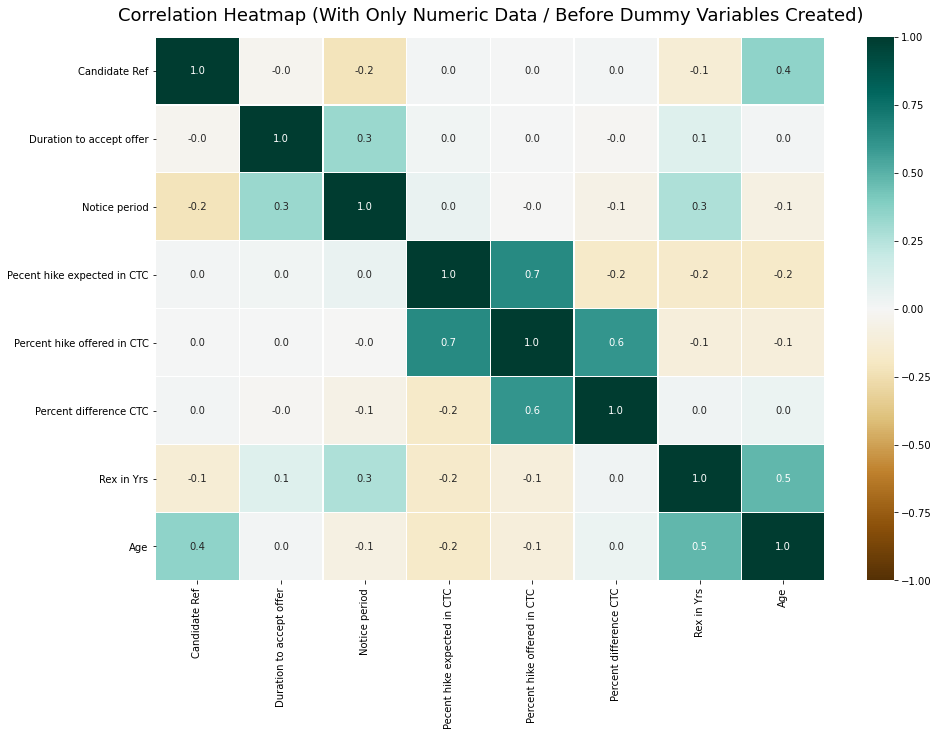

In [23]:
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
plt.figure(figsize=(15, 10))

# define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(),
                    #   mask=mask,
                      vmin=-1, vmax=1,
                      fmt=".1f", # Round to One Decimal
                      annot=True, # Annotate Values 
                      cmap='BrBG', # Change Color Palette,
                      linewidth=.5
                      )
heatmap.set_title('Correlation Heatmap (With Only Numeric Data / Before Dummy Variables Created)', fontdict={'fontsize':18}, pad=16)

### Creating Dummy Variables from Nominal/Ordinal Data

In [14]:
df = data
dfcat_cols = df.select_dtypes('object').columns.tolist()
df = pd.get_dummies(df, columns=dfcat_cols, drop_first=True)

Text(0.5, 1.0, 'Features Correlating w/ Candidates Not Joining Company')

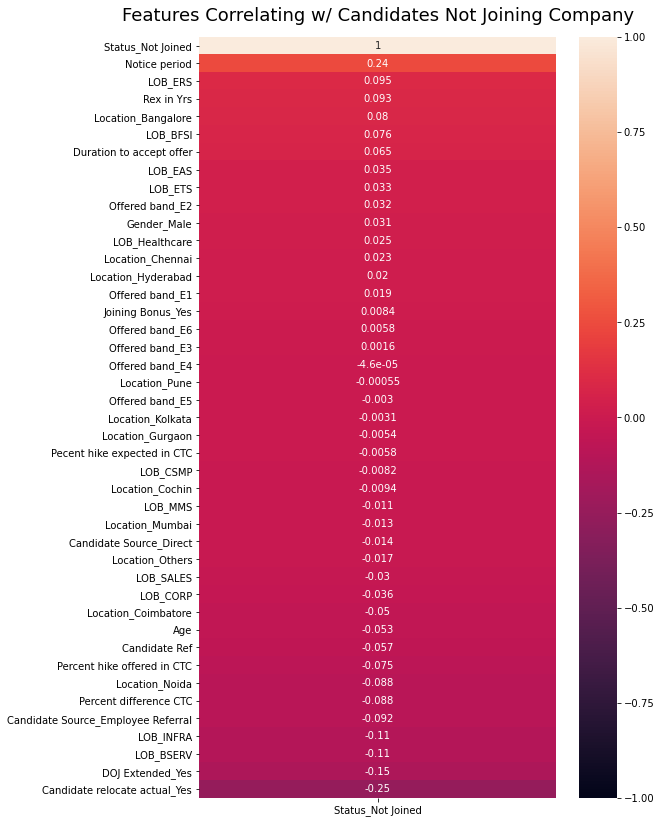

In [22]:
plt.figure(figsize=(8, 14))
heatmap = sns.heatmap(df.corr()[['Status_Not Joined']].sort_values(by='Status_Not Joined',
                                                                  ascending=False),
                                                                  vmin=-1, vmax=1,
                                                                  annot=True
                                                                  #cmap='BrBG'
                                                                  )
heatmap.set_title('Features Correlating w/ Candidates Not Joining Company', fontdict={'fontsize':18}, pad=16)

### Notice period

[Text(0.5, 1.0, 'Notice period served before candidate can join the company')]

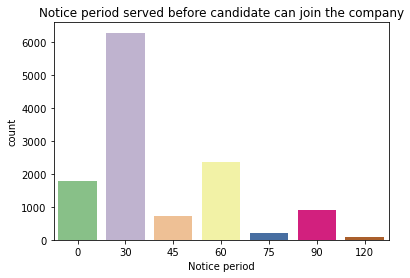

In [13]:
sns.countplot(data=data,
             x="Notice period",
             # Create X access label for Days Notice Period(Days)
             # Create Y axis label for # of Candidates
             palette='Accent').set(title='Notice period served before candidate can join the company')

### Offered band
<B><i>Band offered to candidate based on experience, performance</b></i> <br><br>
Later I might be able to see if the model can be improved upon by grouping those in E4 to E6, since currently there aren't nearly as many values.

<AxesSubplot:xlabel='Offered band', ylabel='count'>

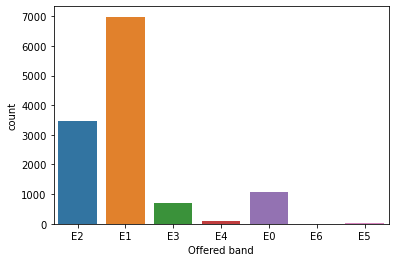

In [14]:
sns.countplot(data=data,
             x="Offered band",
            #  palette='Accent'
             )

### Percent hike OFFERED in CTC vs. Percent hike EXPECTED in CTC
<B><i> Percentage hike offered by the company</b></i> vs. 
<B><i>Percentage hike expected by the candidate</b></i>

<AxesSubplot:xlabel='Percent hike expected in CTC', ylabel='Percent hike offered in CTC'>

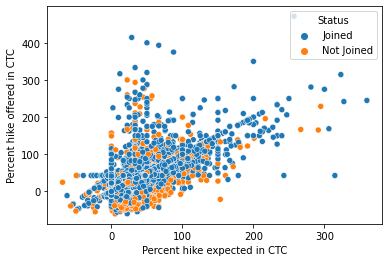

In [24]:
# Column Name Incorrectly spelled
data.rename(columns = {'Pecent hike expected in CTC':'Percent hike expected in CTC'}, inplace=True)

sns.scatterplot(data=data,
                x='Percent hike expected in CTC',
                y='Percent hike offered in CTC',
                # Add Axis Labels
                hue='Status')

<a id='another_cell'></a>

### Percent difference CTC
<B><i> Difference between expected and offered hike</b></i> <br><br>
It appears that many of the orange vaues cluster together.

<AxesSubplot:xlabel='Percent hike expected in CTC', ylabel='Percent hike offered in CTC'>

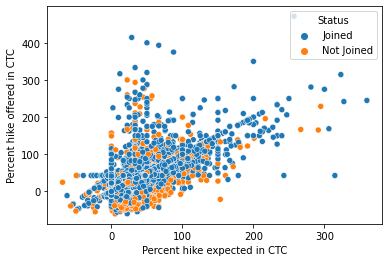

In [25]:
sns.scatterplot(data=data,
                x='Percent hike expected in CTC',
                y='Percent hike offered in CTC',
                hue='Status')

<AxesSubplot:xlabel='Percent difference CTC', ylabel='Status'>

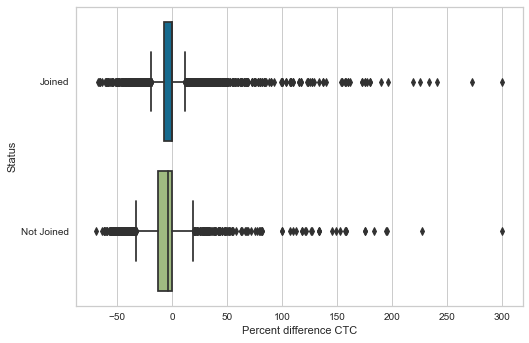

In [ ]:
sns.boxplot(data=data,
                x='Percent difference CTC',
                y='Status'
                )

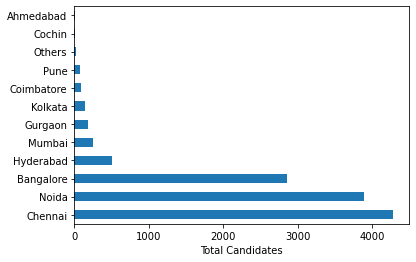

In [16]:
data['Location'].value_counts().plot(kind='barh').set(
    xlabel='Total Candidates'
)
plt.show()

In [26]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(data)

data = data.dropna()

# Dropping Unique ID for each Candidate... doesn't make sense to include.
# Dropping Age for each candidate it's illegal... Also dropping Proxy Variables based on heatmap
data = data.drop(columns=['Candidate Ref','Age','Percent hike expected in CTC','Percent hike offered in CTC'])

Your selected dataframe has 17 columns.
There are 4 columns that have missing values.


In [ ]:
# Cool Histogram, but potentially unecessary

# fig = px.histogram(data,
#                     x='Duration to accept offer',
#                     template='plotly_white',
#                     title='Distribution of Duration to accept offer')
                    
# fig.update_xaxes(categoryorder='category descending', title='Duration').update_yaxes(title='Count')
# fig.show()

### PyCaret
<a href='https://www.pycaret.org/'>PyCaret</a> is an open source machine learning library that automates machine learning workflows.

In [ ]:
from pycaret.classification import *
s = setup(data,
         target = 'Status_Not Joined',
        #  pca = True,
        #  pca_components= 10
         # ignore_features=
         )

,Description,Value
0,session_id,6899
1,Target,Status_Not Joined
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(8995, 32)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# Include refers to what models to include... more models = longer runtime
best = compare_models(include = ['qda','rf','lr'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8197,0.7370,0.0477,0.6288,0.0880,0.0631,0.1338,0.1440
rf,Random Forest Classifier,0.8126,0.7378,0.1828,0.4719,0.2630,0.1791,0.2059,0.2850
qda,Quadratic Discriminant Analysis,0.3835,0.5886,0.8706,0.1908,0.3129,0.0605,0.1547,0.4720


In [ ]:
# This lets you see various plots related to model specification
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

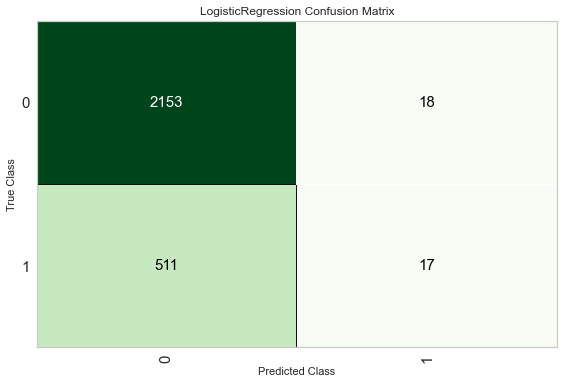

In [ ]:
# This plots only a Confusion Matrix [which can also be selected as a model above]
plot_model(best, plot = 'confusion_matrix')

In [ ]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8040,0.7303,0.0322,0.4857,0.0604,0.0370,0.0838


,Duration to accept offer,Percent difference CTC,Rex in Yrs,DOJ Extended_Yes,Offered band_E1,Offered band_E2,Offered band_E3,Joining Bonus_Yes,Candidate relocate actual_Yes,Gender_Male,...,Notice period_0,Notice period_120,Notice period_30,Notice period_45,Notice period_60,Notice period_75,Notice period_90,Status_Not Joined,Label,Score
0,27.0,0.000000,4.0,1,0,0,1,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9022
1,2.0,0.000000,4.0,0,0,1,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8930
2,57.0,0.000000,8.0,0,0,1,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.8922
3,2.0,-4.550000,4.0,1,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.7673
4,43.0,6.670000,4.0,1,0,1,0,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,26.0,0.000000,3.0,1,1,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8983
2695,45.0,4.170000,3.0,1,1,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8163
2696,1.0,-25.000000,3.0,1,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9976
2697,14.0,158.330002,7.0,1,0,1,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.9060


In [ ]:
predictions = predict_model(best, data=data)
predictions.head()
type(predictions)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8160,0.7413,0.0476,0.6015,0.0882,0.0625,0.1302


pandas.core.frame.DataFrame

In [ ]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Status_Not Joined',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 num...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_we

In [ ]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Status_Not Joined',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                num...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
               


### Datacamp: Random Forest Classifier
https://www.datacamp.com/tutorial/random-forests-classifier-python

In [ ]:
dt = create_model('gbc')
dt_results = pull()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.7660,0.0870,0.6667,0.1538,0.1166,0.1957
1,0.8190,0.7507,0.0870,0.5263,0.1493,0.1028,0.1569
2,0.8206,0.7675,0.0862,0.5882,0.1504,0.1084,0.1736
3,0.8190,0.7452,0.0776,0.5625,0.1364,0.0960,0.1576
4,0.8286,0.7863,0.1121,0.7222,0.1940,0.1521,0.2381
5,0.8143,0.7758,0.0776,0.4737,0.1333,0.0860,0.1317
6,0.8219,0.7646,0.1043,0.5714,0.1765,0.1272,0.1868
7,0.8188,0.7392,0.1217,0.5185,0.1972,0.1372,0.1839
8,0.8251,0.7886,0.0870,0.6667,0.1538,0.1166,0.1957


First, you separate the columns into dependent and independent variables (or features and labels). Then you split those variables into a training and test set.

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y = data['Status_Not Joined']
X = data.loc[:, data.columns !='Status_Not Joined']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

After splitting, you will train the model on the training set and perform predictions on the test set.

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

After training, check the accuracy using actual and predicted values.

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8103001111522786


### Finding Important Features in Scikit-learn

Here, you are finding important features or selecting features in the IRIS dataset. In scikit-learn, you can perform this task in the following steps:

- First, you need to create a random forests model.
- Second, use the feature importance variable to see feature importance scores.
- Third, visualize these scores using the seaborn library.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Duration to accept offer              0.259618
Percent difference CTC                0.190532
Rex in Yrs                            0.114226
Notice period                         0.086902
Candidate relocate actual_Yes         0.038276
DOJ Extended_Yes                      0.034068
Candidate Source_Direct               0.031327
Gender_Male                           0.026458
LOB_ERS                               0.017940
Location_Chennai                      0.017179
Candidate Source_Employee Referral    0.016876
LOB_INFRA                             0.016653
Location_Bangalore                    0.016281
Location_Noida                        0.014521
Offered band_E2                       0.013044
Joining Bonus_Yes                     0.012966
LOB_BFSI                              0.012847
Offered band_E1                       0.012618
LOB_ETS                               0.012353
LOB_CSMP                              0.010264
LOB_EAS                               0.008627
Location_Hyde

No handles with labels found to put in legend.


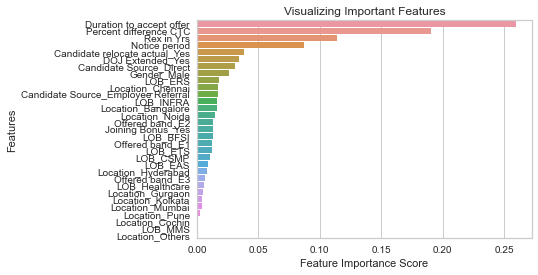

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
data.corr(method='pearson')
#sns.heatmap(data.corr(),vmin=-1, vmax=1)
#sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True)

,Duration to accept offer,Notice period,Percent difference CTC,Rex in Yrs,Status_Not Joined,DOJ Extended_Yes,Offered band_E1,Offered band_E2,Offered band_E3,Joining Bonus_Yes,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
Duration to accept offer,1.000000,0.363760,-0.009395,0.113951,0.065446,0.341545,0.008842,0.013049,0.014363,0.032917,...,0.108741,0.021079,-0.019720,-0.016274,0.033918,0.016953,-0.052902,-0.116962,-0.016741,-0.002475
Notice period,0.363760,1.000000,-0.015067,0.181786,0.192119,0.139732,-0.087029,0.082379,0.092652,0.018093,...,0.022355,-0.006338,-0.012477,0.005084,0.029382,0.027201,-0.057962,-0.013758,-0.009983,0.000274
Percent difference CTC,-0.009395,-0.015067,1.000000,0.081547,-0.033151,-0.007091,-0.128058,0.079085,0.109515,-0.014630,...,-0.011634,0.003052,-0.023281,-0.005958,0.015091,-0.027156,-0.008481,0.016852,0.000558,-0.010089
Rex in Yrs,0.113951,0.181786,0.081547,1.000000,0.037716,0.095200,-0.545470,0.435404,0.450314,0.119621,...,0.048713,-0.017924,-0.023296,-0.020341,0.075979,0.051817,-0.008375,-0.063503,-0.010462,0.021880
Status_Not Joined,0.065446,0.192119,-0.033151,0.037716,1.000000,-0.006102,-0.000103,0.005631,-0.024068,0.004101,...,0.046887,0.044812,-0.004744,0.001577,0.016774,0.011698,-0.030853,-0.089906,-0.018245,0.004009
DOJ Extended_Yes,0.341545,0.139732,-0.007091,0.095200,-0.006102,1.000000,0.007718,0.032074,0.009495,0.065666,...,0.035614,-0.031420,-0.005543,-0.002265,0.074099,0.003122,-0.012388,-0.028325,0.017125,0.001683
Offered band_E1,0.008842,-0.087029,-0.128058,-0.545470,-0.000103,0.007718,1.000000,-0.837219,-0.310874,-0.061109,...,0.089919,0.093636,0.015727,0.012001,-0.040855,-0.011269,-0.009299,-0.167869,0.023820,0.013472
Offered band_E2,0.013049,0.082379,0.079085,0.435404,0.005631,0.032074,-0.837219,1.000000,-0.160191,0.059135,...,-0.051676,-0.072312,-0.011469,0.005746,0.040883,0.014511,0.020901,0.099157,-0.018610,-0.011529
Offered band_E3,0.014363,0.092652,0.109515,0.450314,-0.024068,0.009495,-0.310874,-0.160191,1.000000,0.033509,...,-0.039366,-0.049454,-0.007277,-0.023683,0.024923,0.003078,-0.006798,0.087106,-0.009278,0.002023
Joining Bonus_Yes,0.032917,0.018093,-0.014630,0.119621,0.004101,0.065666,-0.061109,0.059135,0.033509,1.000000,...,0.009330,-0.008902,-0.006578,0.000969,0.022679,0.022323,-0.018542,-0.008537,-0.008388,0.005623


# Choosing a Model

In [ ]:
y = data['Status_Not Joined']
X = data.loc[:, data.columns !='Status_Not Joined']

In [ ]:
# Based on this, it seems like doing smote isn't a bad idea after all.
data['Status_Not Joined'].value_counts()

0    7313
1    1682
Name: Status_Not Joined, dtype: int64

### Random Forest Classifier

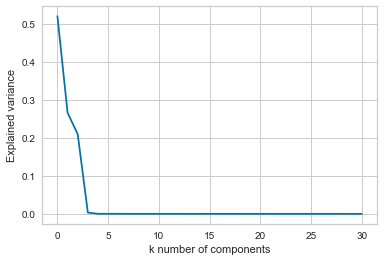


Classification Report after PCA

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1463
           1       0.91      0.83      0.87      1463

    accuracy                           0.87      2926
   macro avg       0.87      0.87      0.87      2926
weighted avg       0.87      0.87      0.87      2926

<BarContainer object of 31 artists>
                                    importance_value
Duration to accept offer                    0.165277
Percent difference CTC                      0.121346
Rex in Yrs                                  0.080671
Candidate relocate actual_Yes               0.075284
Notice period                               0.071139
Location_Noida                              0.048751
LOB_INFRA                                   0.047690
Candidate Source_Employee Referral          0.046212
Candidate Source_Direct                     0.041471
Location_Bangalore                          0.036008
Location_Chennai    

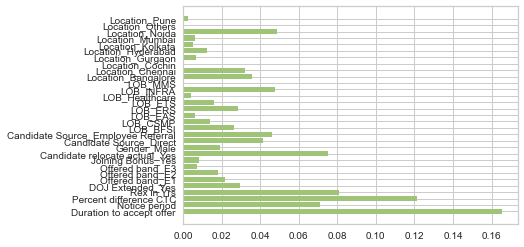

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection  import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

## SMOTE balancing
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X, y)

# 1. PCA
pca_prep = PCA().fit(X_sm)
pca_prep.n_components_
pca_prep.explained_variance_ratio_
plt.plot(pca_prep.explained_variance_ratio_)
plt.xlabel('k number of components')
plt.ylabel('Explained variance')
plt.grid(True)
plt.show()
# Choose 20
n_pc = 20
pca = PCA(n_components= n_pc).fit(X_sm)
Xp = pca.transform(X_sm)
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size =.2,
                                             random_state=1234,stratify=y_sm)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp,y_sm,test_size =.2,
                                        random_state=1234,stratify=y_sm)
rfcm = RandomForestClassifier().fit(X_train, y_train)
rfcm_p = RandomForestClassifier().fit(Xp_train, yp_train)
y_pred = rfcm.predict(X_test)
y_pred_p = rfcm_p.predict(Xp_test)
print('\nClassification Report after PCA\n')
print(metrics.classification_report(yp_test,y_pred_p))
# 2. Feature selection
feature_names = X_sm.columns
%matplotlib inline
importances = rfcm.feature_importances_
print(plt.barh(feature_names,importances))
# Draw a bar chart to see the sorted importance values with feature names.
df_importances = pd.DataFrame(data=importances, index=feature_names,
                              columns=['importance_value'])
df_importances.sort_values(by = 'importance_value', ascending=False,
                           inplace=True)
print(df_importances)
print(plt.barh(df_importances.index,df_importances.importance_value))
selector = SelectFromModel(estimator=RandomForestClassifier(),threshold='mean')
X_reduced = selector.fit_transform(X_sm,y_sm)
selector.threshold_
selected_TF = selector.get_support()
print(f'\n** {selected_TF.sum()} features are selected.')
#This shows how many features are selected.
# Show those selected features.
selected_features = []
for i,j in zip(selected_TF, feature_names):
    if i: selected_features.append(j)
print(f'Selected Features: {selected_features}')
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test \
       = train_test_split(X_reduced,y_sm,test_size =.2, stratify=y_sm)
# Build a model with the reduced number of features.
rfcm2 = RandomForestClassifier().fit(X_reduced_train, y_reduced_train)
y_reduced_pred = rfcm2.predict(X_reduced_test)
print('\nClassification Report after feature reduction\n')
print(metrics.classification_report(y_reduced_test,y_reduced_pred))